# 신경망 만들기

Step 1. 기본 클래스 만들기
- 구조 정의
- 학습
- 추론

In [1]:
import numpy as np
import scipy.special

In [12]:
# 신경망 클래스 정의
class MyNeuralNet:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.innode = inputnodes
        self.hnode = hiddennodes
        self.outnode = outputnodes
        
        # 학습률
        self.lr = learningrate
        
        self.wih = np.random.rand(self.hnode, self.innode) - 0.5
        self.who = np.random.rand(self.outnode, self.hnode) - 0.5
        
        pass
    
    def printWeight(self):
        print(self.wih.shape, self.wih)
        print(self.who.shape, self.who)
    
    # forward and backward
    def train(self, input_list, target_list):
        input = np.array(input_list, ndmin = 2).T
        
        # input -> hidden
        hidden_input = np.dot(self.wih, input)
        hidden_output = scipy.special.expit(hidden_input)
        
        # hidden -> output
        output_hidden = np.dot(self.who, hidden_output)
        final_outputs = scipy.special.expit(output_hidden)
        
        # Get Error
        targets = np.array(target_list, ndmin = 2).T
        output_error = targets - final_outputs
        hidden_error = np.dot(self.who.T, output_error)
        
        # Update weight
        self.who += self.lr * \
                            np.dot((output_error * final_outputs) * (1.0 - final_outputs), \
                            np.transpose(hidden_output))
        
        self.wih += self.lr * \
                            np.dot((hidden_error * hidden_output) * (1.0 - hidden_output), \
                            np.transpose(input))
        
    # forward
    def inference(self, input_list):
        input = np.array(input_list, ndmin = 2).T
        
        # input -> hidden
        hidden_input = np.dot(self.wih, input)
        hidden_output = scipy.special.expit(hidden_input)
        
        # hidden -> output
        output_hidden = np.dot(self.who, hidden_output)
        final_output = scipy.special.expit(output_hidden)
        
        return final_output

In [43]:
net = MyNeuralNet(4, 2, 3, 0.9)
print(net.inference([10,10,20,20]))
net.train([10, 20, 40, 50], [0.5, 0.2, 0.1])
print(net.inference([10,10,20,20]))

[[0.4450274 ]
 [0.49485994]
 [0.39709852]]
[[0.44804714]
 [0.4782891 ]
 [0.381878  ]]


# MNIST

In [4]:
# !pip install numpy

In [44]:
# !mkdir mnist_data  #폴더만들기

In [2]:
import shutil
import requests #http 를 받을수있는 모듈

from tqdm import tqdm
import requests

In [45]:
mnist_train_url = 'http://www.pjreddie.com/media/files/mnist_train.csv'
mnist_test_url = 'http://www.pjreddie.com/media/files/mnist_test.csv'

In [4]:
import shutil
import requests #http 를 받을수있는 모듈

def download(url, file_name, file_mode='wb'):
    response = requests.get(url, stream=True)
    with open(file_name, file_mode) as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

In [49]:
download(mnist_train_url, 'mnist_data/mnist_train.csv', 'wb')
download(mnist_test_url, 'mnist_data/mnist_test.csv', 'wb')

In [50]:
#다운로드 업그레이드 버전

from tqdm import tqdm
import requests

# url = 'http://www.ovh.net/files/10Mb.dat' # big file test
def download(url, file_name, file_mode = 'wb'):
    # Streaming, so we can iterate over the response
    response = requests.get(url, stream=True)
    total_size_in_bytes=int(response.headers.get('content-length', 0))
    block_size=1024 #1 Kibibyte
    progress_bar=tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open(file_name, file_mode) as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print('ERROR, something went wrong')

In [51]:
download(mnist_train_url, 'mnist_data/mnist_train.csv', 'wb')
download(mnist_test_url, 'mnist_data/mnist_test.csv', 'wb')

100%|██████████████████████████████████████████████████████████████████████████████| 110M/110M [00:53<00:00, 2.05MiB/s]
100%|████████████████████████████████████████████████████████████████████████████| 18.3M/18.3M [00:07<00:00, 2.60MiB/s]


In [52]:
mnist_train_100_url = 'https://git.io/vySZ1'
mnist_test_10_url = 'https://git.io/vySZP'

download(mnist_train_100_url, 'mnist_data/mnist_train_100.csv', 'wb')
download(mnist_test_10_url, 'mnist_data/mnist_test_10.csv', 'wb')

182kiB [00:00, 11.4MiB/s]                                                                                              


ERROR, something went wrong


18.0kiB [00:00, 2.23MiB/s]                                                                                             

ERROR, something went wrong


In [5]:
import pandas as pd
csv_test = pd.read_csv('mnist_data/mnist_test_10.csv', header=None)
csv_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 패키지가 없는 극한의 환경
data_file = open('mnist_data/mnist_test_10.csv', 'r')
data_list = data_file.readlines()
data_file.close()
len(data_list)
print(data_list[0])

7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0

# Display Image

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Number :  1


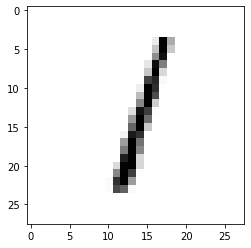

In [8]:
all_values = data_list[2].split(',')
# all_values = csv_test.iloc[0].to_numpy()
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
print('Number : ', all_values[0])

# Prepare training data

In [9]:
# convert pixel range 0 ~ 255 to 0.01 ~ 1.0
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)
print(scaled_input.shape)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [10]:
# label (0.01 ~ 0.99)
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(all_values[0], targets)

1 [0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


# train

In [15]:
input_nodes = 784
hidden_nodes = 120
output_nodes = 10

learning_rate = 0.1
epoch=5
n = MyNeuralNet(input_nodes, hidden_nodes, output_nodes, learning_rate)
n.printWeight()

(120, 784) [[-2.12605908e-01 -2.80040376e-01  1.70085611e-01 ... -2.51324319e-04
  -4.80356361e-02 -4.44155123e-01]
 [ 3.29699959e-01 -3.30961544e-01 -3.87525453e-01 ...  3.76227482e-01
   4.37547078e-01  1.73491316e-01]
 [ 4.90640681e-01 -4.57038330e-01  3.56365926e-01 ...  4.83864274e-01
   4.98134507e-01  1.17180053e-01]
 ...
 [-1.30615703e-01 -3.75419731e-01 -4.55768707e-01 ...  2.62644506e-01
  -1.50521162e-01  3.84838955e-01]
 [-4.39769276e-04  4.02049030e-01 -5.25693337e-02 ...  4.50579916e-01
   4.27957481e-01  3.32050775e-01]
 [-7.16187764e-03  1.43141530e-02 -4.22019913e-01 ...  2.34317196e-01
  -8.90883866e-02  2.33321232e-01]]
(10, 120) [[ 0.08945801 -0.3058691  -0.22970851 ... -0.40881811 -0.26710951
  -0.34875295]
 [ 0.42197598 -0.37532454  0.4755078  ... -0.02943921  0.3740739
   0.36744245]
 [-0.45056287  0.42276332 -0.1768281  ...  0.103852    0.28824636
   0.34122401]
 ...
 [ 0.00884637  0.45415721 -0.30734475 ... -0.18712743  0.11851977
   0.19460514]
 [ 0.10079532  

In [16]:
training_data_file = open('mnist_data/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [17]:
from tqdm import tqdm
for i in range(epoch):
    print('===={} epoch ===='.format(i+1))
    progress_bar = tqdm(total=len(training_data_list),unit="iB", unit_scale=True)
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99999) + 0.000001
        targets = np.zeros(output_nodes) + 0.000001
        targets[int(all_values[0])] = 0.99999
        n.train(inputs, targets)
        
        progress_bar.update(1)
    progress_bar.close()

  0%|▏                                                                             | 171/60.0k [00:00<00:35, 1.70kiB/s]

====1 epoch ====


100%|████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [00:25<00:00, 2.32kiB/s]
  1%|▌                                                                             | 399/60.0k [00:00<00:29, 2.02kiB/s]

====2 epoch ====


100%|████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [00:25<00:00, 2.32kiB/s]
  0%|▎                                                                             | 222/60.0k [00:00<00:27, 2.20kiB/s]

====3 epoch ====


100%|████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [00:25<00:00, 2.36kiB/s]
  1%|▌                                                                             | 435/60.0k [00:00<00:27, 2.19kiB/s]

====4 epoch ====


100%|████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [00:25<00:00, 2.37kiB/s]
  0%|▎                                                                             | 210/60.0k [00:00<00:28, 2.08kiB/s]

====5 epoch ====


100%|████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [00:25<00:00, 2.33kiB/s]


In [18]:
test_data_file = open('mnist_data/mnist_train.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [25]:
score = []
for record in test_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    result= n.inference(inputs)
    if int(all_values[0]) == result.argmax():
          score.append(1)
    else:
        score.append(0)
score_array = np.asarray(score)
accuracy= score_array.sum()/ score_array.size
print('accuracy=',accuracy)

accuracy= 0.967


In [20]:
import pickle
filename = f'{input_nodes}-{hidden_nodes}-{output_nodes}-{learning_rate}-ep{epoch}-acc{accuracy}.obj'

filehandler= open(filename,'wb')
pickle.dump(n,filehandler)
filehandler.close()



In [22]:
file= open("784-120-10-0.1-ep5-acc0.9815166666666667.obj","rb")
loadedNet = pickle.load(file)
file.close()

print(loadedNet)
# print(loadedNet,inference([10,10,20,20]))

# Test

In [23]:
test_data_file = open('mnist_data/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [108]:
# matchfalse = 0
# for record in test_data_list:
#     all_values = record.split(',')
#     inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#     result = n.inference(inputs)
#     print('test result : {} to {}'.format(all_values[0], result.argmax()))
#     if int(all_values[0]) != int(result.argmax()):
#         matchfalse += 1
# print(str(matchfalse/len(test_data_list)*100)+"%")

In [24]:
score = []
for record in test_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    result= loadedNet.inference(inputs)
    if int(all_values[0]) == result.argmax():
          score.append(1)
    else:
        score.append(0)
score_array = np.asarray(score)
accuracy= score_array.sum()/ score_array.size
print('accuracy=',accuracy)

accuracy= 0.967


In [ ]:
cunstom Data

In [10]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from PIL import Image, ImageOps

In [21]:
img= Image.open('4_001.png')
img_gray= img.convert("L")
print(img)
print(img_gray)
# img_gray.show()

img_inverted =ImageOps.invert(img_gray)
# img_inverted.show()

pixel_list = np.asarray(img_inverted).flatten().tolist()
pixel_list.insert(0,5)
print(len(pixel_list))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=28x28 at 0x2558DFB13A0>
<PIL.Image.Image image mode=L size=28x28 at 0x2558D28FFA0>
785


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=28x28 at 0x2558DFB14F0>
<PIL.Image.Image image mode=L size=28x28 at 0x2558C4733D0>
785
Number :  4


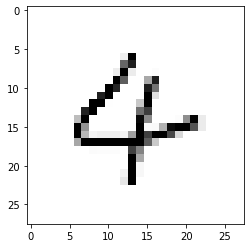

In [23]:
img= Image.open('4_001.png')
img_gray= img.convert("L")
print(img)
print(img_gray)
# img_gray.show()

img_inverted =ImageOps.invert(img_gray)
# img_inverted.show()

pixel_list = np.asarray(img_inverted).flatten().tolist()
pixel_list.insert(0,4)
print(len(pixel_list))

image_array = np.asfarray(pixel_list[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
print('Number : ', pixel_list[0])